<a href="https://colab.research.google.com/github/Dhatrikowthavarapu/Machine-Learning/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
import numpy as np
a= np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [ ]:
b= np.array([[2,9,3],[-1,2,7]])
print(b)
print(b.shape)

[[ 2  9  3]
 [-1  2  7]]
(2, 3)


In [ ]:
print(a*b)

[[ 2 18  9]
 [-4 10 42]]


In [ ]:
c=np.array([[2,9],[-1,2]])
print(c.shape)
print(c.ndim)
d=np.array([[-5,3],[7,6]])
print(d.shape)

(2, 2)
2
(2, 2)


In [ ]:
np.dot(c,d)

array([[53, 60],
       [19,  9]])

In [ ]:
x=np.array([1,1.3,1.7])
y=np.array([1.8,1,2.7])
print(x.ndim)
print(x.shape)

1
(3,)


In [ ]:
def net_input(c,d):
  return np.dot(c,d)

In [ ]:
net_input(c,d)

array([[53, 60],
       [19,  9]])

In [ ]:
def logistic(z):
  return 1.0/(1.0+np.exp(-z))
logistic(0)

0.5

In [ ]:
logistic(5)

0.9933071490757153

In [ ]:
def logistic_activation(x,w):
  z = net_input(x,w)
  return logistic(z)
logistic_activation(c,d)

array([[1.        , 1.        ],
       [0.99999999, 0.99987661]])

In [ ]:
logistic_activation(x,y)

0.9995428309274196

In [ ]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
num=np.arange(1,10)

In [ ]:

def sigmoid(x):
  return 1/(1+np.exp(-x))
sig=sigmoid(num)
print(num)
print(sig)

[1 2 3 4 5 6 7 8 9]
[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715 0.99752738
 0.99908895 0.99966465 0.99987661]


In [ ]:
import matplotlib.pyplot as plt



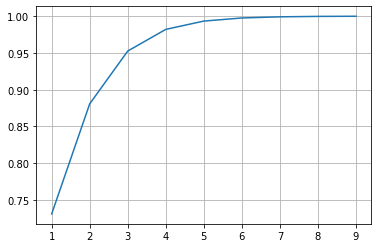

In [ ]:
fig,ax=plt.subplots()
ax.plot(num,sig)
ax.grid(True)
plt.show()

# Tanh

In [ ]:
def tanh(x):
  return (2/(1+np.exp(-2*x)))-1

In [ ]:
tanh(num)

array([0.76159416, 0.96402758, 0.99505475, 0.9993293 , 0.9999092 ,
       0.99998771, 0.99999834, 0.99999977, 0.99999997])

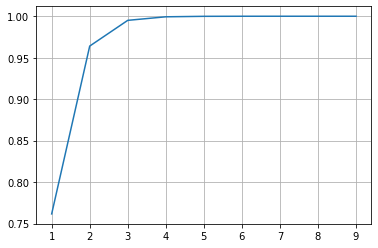

In [ ]:


fig,ax=plt.subplots()
ax.plot(num,tanh(num))
ax.grid(True)
plt.show()

# Relu

In [ ]:
def relu(x):
  return np.maximum(0,x)


In [ ]:
relu1=relu(num)
relu1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

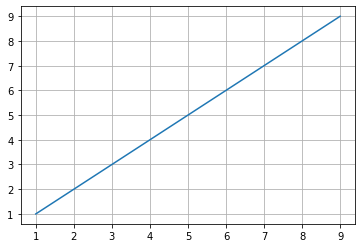

In [ ]:
fig,ax=plt.subplots()
ax.plot(num,relu1)
ax.grid(True)
plt.show()

### Artificial neural network without hidden layer

## step 1

In [ ]:
#input_set
input = np.array([[0,0,1],[0,1,0],[1,0,0],[1,1,0],[0,1,1],[1,0,1],[1,1,1]])
#dependent variables
label=np.array([[1,0,0,1,1,0,1]])
label.shape

(1, 7)

In [ ]:
label=label.reshape(7,1)

In [ ]:
label

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

## step 2 : Defining Hyperparameters

In [ ]:
np.random.seed(42)
weights=np.random.rand(3,1)
bias = np.random.rand(1)
lr=0.05
weights

array([[0.37454012],
       [0.95071431],
       [0.73199394]])

In [ ]:
bias

array([0.59865848])

## Step3 : Defining Activation Functions

In [ ]:
#wx = w1.x1+w2.x2+w3.x3+......

def sigmoid(x):
  return 1/(1+np.exp(-x))


sigmoid(5)

0.9933071490757153

In [ ]:
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

sigmoid_derivative(5)

0.006648056670790033

In [ ]:
for epoch in range(5000):
  inputs = input      #input_set
  xw=np.dot(inputs,weights)+bias    #step 1
  z=sigmoid(xw)
  #1st step of back propagation
  #finding error
  error = z-label #Start back propagation
  print(error.sum())

  #Differentiating the cost function wrt each weight and this can done using chain rule of differentiation
  dcost = error
  dpred=sigmoid_derivative(z)
  z_del = dcost*dpred
  inputs =input.T
  weights=weights-lr*np.dot(inputs,z_del)
  for n in z_del:
    bias=bias-lr*n

1.9020102416996203
1.8713603325274177
1.8404780340323925
1.809395501559468
1.7781456404085563
1.7467619544988824
1.7152783897649835
1.683729173923013
1.6521486543041344
1.620571135477986
1.5890307183828538
1.557561142640692
1.5261956336655995
1.4949667560761672
1.463906274798035
1.433045025096805
1.4024127926171999
1.3720382043266324
1.3419486310747728
1.3121701022900574
1.2827272331438282
1.2536431643273058
1.224939514409633
1.1966363445801433
1.1687521354275976
1.1413037752754347
1.1143065594766857
1.0877741999759232
1.0617188443687606
1.0361511036317705
1.0110800876565103
0.9865134476995941
0.9624574248549833
0.9389169036633085
0.9158954699942607
0.8933954723701096
0.8714180859392638
0.849963378356765
0.829030376881834
0.8086171360595542
0.7887208054129129
0.7693376966314578
0.7504633498025985
0.7320925982901142
0.7142196319209206
0.696838058194961
0.6799409612837121
0.6635209586299189
0.6475702550045009
0.6320806939160706
0.6170438063040468
0.6024508564780646
0.5882928852943059
0.5

In [ ]:
single_pt=np.array([1,0,0])
result=sigmoid(np.dot(single_pt,weights)+bias)
print(result)

[0.02050185]


Deeplearning frameworks ---> tensor flow ,keras

In [ ]:
import sys
sys.version

'3.8.16 (default, Dec  7 2022, 01:12:13) \n[GCC 7.5.0]'

In [ ]:
!--https://colab.research.google.com/drive/16NZDXftxaNatlwAi1zaGlZ35jSYYHvty?usp=sharingpy --version

/bin/bash: --: invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


**2nd Day**

In [ ]:
import tensorflow as tf
#check version of it
tf.__version__

'2.9.2'

In [ ]:
#create a tensor
hello = tf.constant("hello world")
print(hello)
#to access the tensor value,we have to call it by using numpy
print(hello.numpy())

tf.Tensor(b'hello world', shape=(), dtype=string)
b'hello world'


In [ ]:
a=tf.constant(2)
a

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
print(a.numpy())

2


In [ ]:
print(a.numpy().ndim)

0


In [ ]:
a=tf.constant(["b"])
a

<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'b'], dtype=object)>

In [ ]:
print(a.numpy())
print(a.numpy().ndim)

[b'b']
1


In [ ]:
a=tf.constant([[2,3,4],
               [3,4,5]])
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 4],
       [3, 4, 5]], dtype=int32)>

In [ ]:
a=tf.constant(5)
b=tf.constant(7)
c=tf.add(a,b)
print(c.numpy())
print(c)

12
tf.Tensor(12, shape=(), dtype=int32)


In [ ]:
# Multiplication of matrix -->Dot product
x=tf.constant([[2,5],[6,1]])
y=tf.constant([[6,1],[2,5]])
print(x)
print(y)
print(x.numpy(),y.numpy())

tf.Tensor(
[[2 5]
 [6 1]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[6 1]
 [2 5]], shape=(2, 2), dtype=int32)
[[2 5]
 [6 1]] [[6 1]
 [2 5]]


In [ ]:
tf.matmul(x,y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[22, 27],
       [38, 11]], dtype=int32)>

In [ ]:
#input_set
x = np.array([[0,0,1],[0,1,0],[1,0,0],[1,1,0],[0,1,1],[1,0,1],[1,1,1]])
#dependent variables
y=np.array([[1,0,0,1,1,0,1]])
y.shape

(1, 7)

In [ ]:
y=y.reshape(7,1)

In [ ]:
from tensorflow import keras
#define model
model=keras.Sequential()

#add dense layer with 1 unit and a sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid',input_shape=(3,)))

In [ ]:
#compiling the model by specifying the loss function
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#ready to train model ,we can do this by using fit method and train the data
model.fit(x,y,epochs=15,batch_size=1)

Epoch 1/15
7/7 [==============================] - 1s 4ms/step - loss: 0.9583 - accuracy: 0.4286
Epoch 2/15
7/7 [==============================] - 0s 4ms/step - loss: 0.9542 - accuracy: 0.4286
Epoch 3/15
7/7 [==============================] - 0s 8ms/step - loss: 0.9512 - accuracy: 0.4286
Epoch 4/15
7/7 [==============================] - 0s 5ms/step - loss: 0.9480 - accuracy: 0.4286
Epoch 5/15
7/7 [==============================] - 0s 5ms/step - loss: 0.9454 - accuracy: 0.4286
Epoch 6/15
7/7 [==============================] - 0s 3ms/step - loss: 0.9424 - accuracy: 0.4286
Epoch 7/15
7/7 [==============================] - 0s 3ms/step - loss: 0.9388 - accuracy: 0.4286
Epoch 8/15
7/7 [==============================] - 0s 6ms/step - loss: 0.9357 - accuracy: 0.4286
Epoch 9/15
7/7 [==============================] - 0s 5ms/step - loss: 0.9330 - accuracy: 0.4286
Epoch 10/15
7/7 [==============================] - 0s 4ms/step - loss: 0.9297 - accuracy: 0.4286
Epoch 11/15
7/7 [======================

In [ ]:
#evaluation of model
loss,accuracy = model.evaluate(x,y)
print('loss :',loss)
print('Accuracy :',accuracy)

1/1 [==============================] - 0s 439ms/step - loss: 0.9142 - accuracy: 0.4286
loss : 0.9141640067100525
Accuracy : 0.4285714328289032


In [ ]:
#we will split data into training and testing
from sklearn.model_selection import train_test_split

In [ ]:
a,b=np.arange(10).reshape(5,2),range(5)
print(a)
print(b)
train_test_split(a,b)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
range(0, 5)


[array([[6, 7],
        [4, 5],
        [2, 3]]), array([[8, 9],
        [0, 1]]), [3, 2, 1], [4, 0]]

In [ ]:
q,w,e,r=train_test_split(a,b)
print(q)
print(w)
print(e)
print(r)

[[0 1]
 [6 7]
 [4 5]]
[[8 9]
 [2 3]]
[0, 3, 2]
[4, 1]


In [ ]:
#dividing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#define model
model=keras.Sequential()

#add dense layer with 1 unit and a sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid',input_shape=(3,)))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#define an earlystopping callback
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3)

In [ ]:
#ready to train model
model.fit(x_train,y_train,epochs=20,
          batch_size=1,validation_data=(x_test,y_test),
          callbacks=[callback])

Epoch 1/20
5/5 [==============================] - 1s 79ms/step - loss: 0.7474 - accuracy: 0.6000 - val_loss: 1.2410 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 15ms/step - loss: 0.7466 - accuracy: 0.6000 - val_loss: 1.2377 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 0.7455 - accuracy: 0.6000 - val_loss: 1.2355 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.7451 - accuracy: 0.6000 - val_loss: 1.2324 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 19ms/step - loss: 0.7442 - accuracy: 0.6000 - val_loss: 1.2295 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.7435 - accuracy: 0.6000 - val_loss: 1.2273 - val_accuracy: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.7430 - accuracy: 0.6000 - val_loss: 1.2245 - val_accuracy: 0.0000e+00

splitting data into train and testing data then no.of epochs and then early stopping callback and then model evaluating

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print('loss :',loss)
print('Accuracy :',accuracy)

1/1 [==============================] - 0s 209ms/step - loss: 1.1908 - accuracy: 0.0000e+00
loss : 1.1907585859298706
Accuracy : 0.0


In [ ]:
#The below process is a sample example for adding hidden layers
# Define the model
model = keras.Sequential()

# Add a hidden layer with 4 units and a ReLU activation function
model.add(keras.layers.Dense(4, activation='relu', input_shape=(3,)))

# Add a dense layer with 1 unit and a sigmoid activation function
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<function matplotlib.pyplot.show(*args, **kw)>

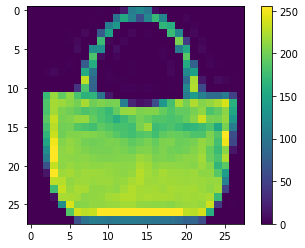

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show


In [ ]:
#scale the images -> 0 to 255 pixles range
train_images = train_images / 255.0
test_images = test_images / 255.0

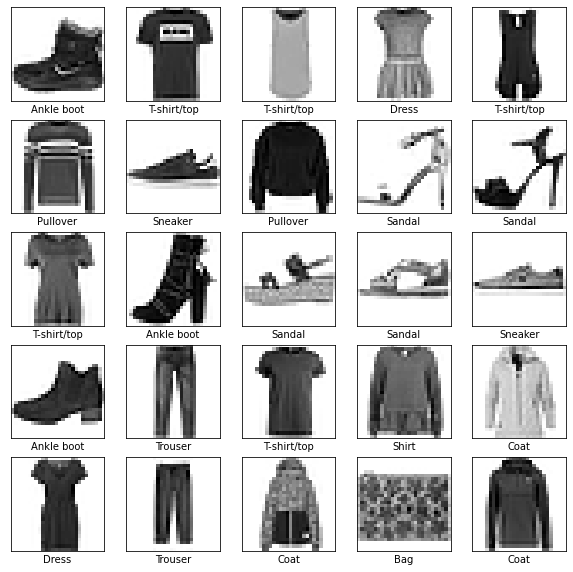

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()




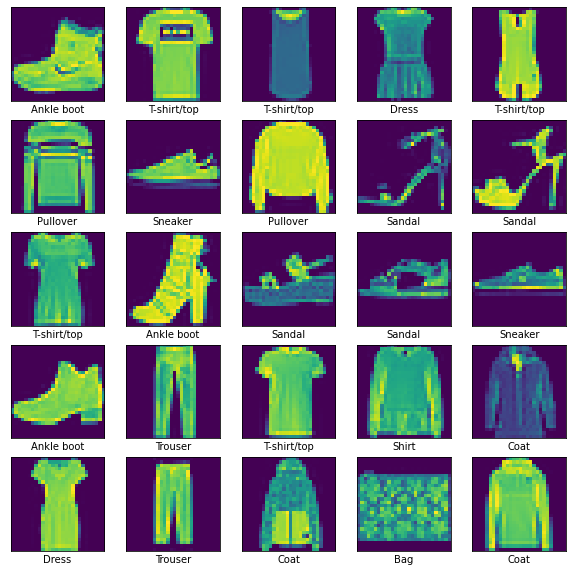

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf. keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras. layers .Dense(10)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy
              (from_logits=True),metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5047 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3783 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3165 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2976 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2702 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2495 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [ ]:
test_loss, test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

313/313 - 1s - loss: 0.3469 - accuracy: 0.8795 - 588ms/epoch - 2ms/step
Test accuracy: 0.8794999718666077


In [ ]:
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [ ]:
predictions=probability_model.predict(test_images)
predictions

313/313 [==============================] - 1s 2ms/step


array([[1.4231917e-06, 1.8900799e-08, 1.4536157e-07, ..., 6.9536760e-02,
        1.0584805e-05, 9.3025869e-01],
       [2.5823723e-05, 4.6742292e-13, 9.9619120e-01, ..., 2.9483263e-20,
        9.9995158e-11, 2.1916415e-16],
       [5.7881971e-07, 9.9999934e-01, 1.0643716e-08, ..., 2.1563159e-23,
        1.3961915e-13, 2.8383291e-16],
       ...,
       [9.0233836e-05, 7.9900531e-12, 1.2325120e-04, ..., 3.8481392e-08,
        9.9882621e-01, 2.8589317e-11],
       [1.3237050e-06, 9.9997157e-01, 5.6715669e-07, ..., 1.9480903e-11,
        4.0717471e-11, 1.6223987e-08],
       [1.1420466e-04, 2.1302019e-06, 5.7011298e-06, ..., 1.4196555e-02,
        2.4167849e-03, 4.5482964e-05]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="violet")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

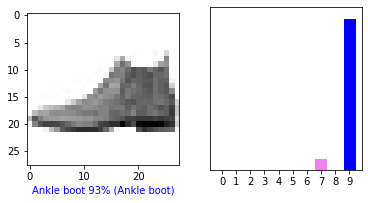

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

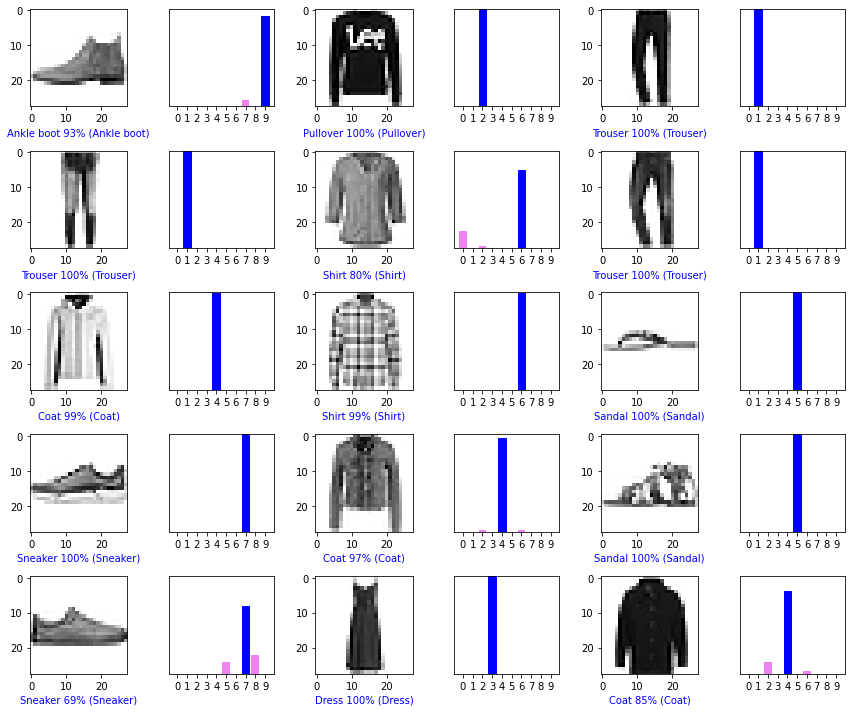

In [ ]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K
from keras.datasets import cifar10

In [ ]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train[100,12,13,1]

0.8235294

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential([Dense(100,activation='relu',input_shape=(32,32,3)),Flatten(),
                    Dense(150,activation='relu'),Dense(10,activation='softmax'),])

In [ ]:
#Functional API approach
from keras .layers import Input, Flatten, Dense
from keras.models import Model
input_layer = Input (shape=(32, 32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation =  'softmax')(x)
model = Model(input_layer, output_layer)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 200)               614600    
                                                                 
 dense_10 (Dense)            (None, 150)               30150     
                                                                 
 dense_11 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compiling the Model
from keras.optimizers import Adam
opt= Adam(lr=0.0005)
model.compile(loss= 'categorical_crossentropy', optimizer=opt,
metrics=['accuracy']) #loss parameter is based on target labels -->Multiclass

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Training the Model

model.fit(x_train,y_train,batch_size = 32,epochs = 10,shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8584 - accuracy: 0.3305
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6673 - accuracy: 0.4042
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5828 - accuracy: 0.4360
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5282 - accuracy: 0.4555
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4962 - accuracy: 0.4657
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4687 - accuracy: 0.4752
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4470 - accuracy: 0.4851
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4243 - accuracy: 0.4936
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4053 - accuracy: 0.4992
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - 

In [ ]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = Batch

NameError: ignored

In [ ]:
import matplotlib. pyplot as plt
n_to_show = 10
indices= np. random. choice(range(1en(x_test)), n_to_show)
print(indices)

fig.subplots_adjust(hspace=0.4, wspace=0.4)

#then we will add our required data values to it
for i, idx in enumerate(indices):
    img = test[1dx]
     ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx])
             fontsize=10, 'ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str (actual_single[idx]),
             fontsize=10, ha= 'center', transform=ax.transAxes)
     ax. imshow(img)


In [ ]:
import pandas as pd